<a href="https://colab.research.google.com/github/sreenivasarvind/CNN_image_classification/blob/main/CNN_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras import regularizers
from keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.python.keras import Sequential
from tensorflow.python.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
from tensorflow import keras
from tensorflow.python.keras.layers import Activation, Dropout
from matplotlib import pyplot as plt
from tensorflow.python.keras.layers.core import Dropout
from keras.layers.normalization.batch_normalization import BatchNormalization

In [ ]:
#1. Import dataset and preprocess
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train = X_train.reshape(X_train.shape[0], 32, 32, 3)
X_test = X_test.reshape(X_test.shape[0], 32, 32, 3)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

170508288/170498071 [==============================] - 11s 0us/step


In [ ]:
X_train.shape

(50000, 32, 32, 3)

In [ ]:
X=np.concatenate([X_train,X_test])
y = np.concatenate([y_train,y_test])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.20,shuffle=True)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, stratify=y_train,test_size=0.20,shuffle=True)

In [ ]:
X_train.shape

(38400, 32, 32, 3)

In [ ]:
#2. Base model (AlexNet) used with variations.

class Train():
  def __init__(self) -> None:
      self.callbacks = [keras.callbacks.EarlyStopping(monitor="val_loss",min_delta=1e-2,patience=2,verbose=1,)]
      self.model=Sequential()

  def AlexNet(self,norm=None):
    self.model.add(Conv2D(filters=96,kernel_size=(3,3),strides=(4,4),input_shape=(32,32,3), activation='relu'))
    if norm=='bn': self.model.add(BatchNormalization()) 
    self.model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
    self.model.add(Conv2D(256,(5,5),padding='same',activation='relu'))
    if norm=='bn': self.model.add(BatchNormalization())
    self.model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
    self.model.add(Conv2D(384,(3,3),padding='same',activation='relu'))
    if norm=='bn': self.model.add(BatchNormalization())
    self.model.add(Conv2D(384,(3,3),padding='same',activation='relu'))
    if norm=='bn': self.model.add(BatchNormalization())
    self.model.add(Conv2D(256,(3,3),padding='same',activation='relu'))
    if norm=='bn': self.model.add(BatchNormalization())
    self.model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

    self.model.add(Flatten())
    self.model.add(Dense(4096, activation='relu'))
    if norm =='dropout': self.model.add(Dropout(0.4))
    elif norm=='l2':
      self.model.add(Dense(4096, activation='relu',kernel_regularizer=regularizers.l2(0.00001)))
    else: 
      self.model.add(Dense(4096, activation='relu'))
    if norm =='dropout': 
      self.model.add(Dropout(0.4))
    self.model.add(Dense(10,activation='softmax'))

  def fit(self,X_train=X_train,y_train=y_train):
    self.model.compile(loss = "categorical_crossentropy", optimizer= "adam", metrics = ["accuracy"])
    self.model.summary()
    trained_model_base=self.model.fit(X_train, y_train,batch_size=64,epochs=50,verbose=1,callbacks=self.callbacks,validation_data=(X_val, y_val))
    return trained_model_base#self.model

In [ ]:
## Training with L2, Batch Norm and Base model
base_train = Train()
l2_train = Train()
bn_train = Train()
l2_train.AlexNet(norm='l2')
trained_model_l2 = l2_train.fit()
base_train.AlexNet()
trained_model_base = base_train.fit()
bn_train.AlexNet(norm='bn')
trained_model_BN = bn_train.fit()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 8, 8, 96)          2688      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 4, 4, 96)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 4, 4, 256)         614656    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 2, 2, 256)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 2, 2, 384)         885120    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 2, 2, 384)         1327488   
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 2, 2, 256)        

In [ ]:
##Final Train on Best result, adding validation to train
X_train = np.concatenate([X_train,X_val])
y_train = np.concatenate([y_train,y_val])
bn_train = Train()
bn_train.AlexNet(norm='bn')
trained_model_BN = bn_train.fit()


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 8, 8, 96)          2688      
_________________________________________________________________
module_wrapper_5 (ModuleWrap (None, 8, 8, 96)          384       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 4, 4, 96)          0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 4, 4, 256)         614656    
_________________________________________________________________
module_wrapper_6 (ModuleWrap (None, 4, 4, 256)         1024      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 2, 2, 256)         0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 2, 2, 384)        

In [ ]:
print("Evaluate on test data")
results =trained_model_BN.evaluate(X_test, y_test, batch_size=64)
print("test loss, test acc:", results)

Evaluate on test data
188/188 [==============================] - 1s 3ms/step - loss: 1.8128 - accuracy: 0.5447
test loss, test acc: [1.8128470182418823, 0.5446666479110718]


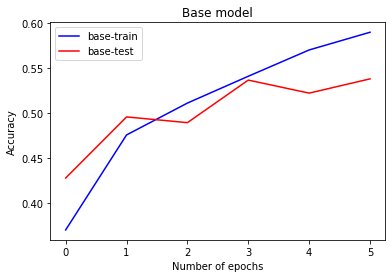

In [ ]:
plt.plot(trained_model_base.history["accuracy"], color ="blue", label = "base-train")
plt.plot(trained_model_base.history["val_accuracy"], color ="red", label = "base-val")
plt.title("Base model")
plt.ylabel("Accuracy")
plt.xlabel("Number of epochs")
plt.legend()
plt.show()

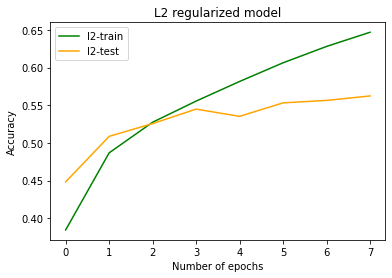

In [ ]:
#4. Plot accuracy (L2 vs Base)
plt.plot(trained_model_l2.history["accuracy"], color ="green", label = "l2-train")
plt.plot(trained_model_l2.history["val_accuracy"], color ="orange", label = "l2-val")
plt.title("L2 regularized model")
plt.ylabel("Accuracy")
plt.xlabel("Number of epochs")
plt.legend()
plt.show()

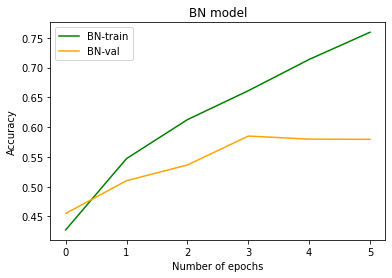

In [ ]:
#8. Plot loss function (BN vs Base)
from matplotlib import pyplot as plt
plt.plot(trained_model_BN.history["accuracy"], color ="green", label = "BN-train")
plt.plot(trained_model_BN.history["val_accuracy"], color ="orange", label = "BN-val")
plt.title("BN model")
plt.ylabel("Accuracy")
plt.xlabel("Number of epochs")
plt.legend()
plt.show()

Part 2

In [ ]:
#Splitting data into 75% and 50%
X_train_75,__, y_train_75,__ = train_test_split(X_train, y_train,test_size=0.25,shuffle=False)
X_train_50,__, y_train_50,__ = train_test_split(X_train, y_train,test_size=0.50,shuffle=False)

In [ ]:
# Training on Batch Norm and L2 for 50% data
l2_train = Train()
bn_train = Train()
l2_train.AlexNet(norm='l2')
trained_model_l2 = l2_train.fit(X_train_50,y_train_50)
bn_train.AlexNet(norm='bn')
trained_model_BN = bn_train.fit(X_train_50,y_train_50)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 8, 8, 96)          2688      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 4, 4, 96)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 4, 4, 256)         614656    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 2, 2, 256)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 2, 2, 256)         590080    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 1, 1, 256)         0         
_________________________________________________________________
flatten (Flatten)            (None, 256)              

In [ ]:
# Training for 75%
base_train = Train()
l2_train = Train()
bn_train = Train()
l2_train.AlexNet(norm='l2')
trained_model_l2_75 = l2_train.fit(X_train_75,y_train_75)
bn_train.AlexNet(norm='bn')
trained_model_BN_75 = bn_train.fit(X_train_75,y_train_75)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 8, 8, 96)          2688      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 4, 4, 96)          0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 4, 4, 256)         614656    
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 2, 2, 256)         0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 2, 2, 256)         590080    
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 1, 1, 256)         0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 256)              

In [ ]:
## Training on 100% data
base_train = Train()
l2_train = Train()
bn_train = Train()
l2_train.AlexNet(norm='l2')
trained_model_l2_100 = l2_train.fit()
bn_train.AlexNet(norm='bn')
import time

start = time.time()
trained_model_BN_100 = bn_train.fit()
end = time.time()

num_mins = (end-start)/60
print("Total training time: "  + str(num_mins) + " minutes.")

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 8, 8, 96)          2688      
_________________________________________________________________
module_wrapper_3 (ModuleWrap (None, 8, 8, 96)          384       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 96)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 4, 4, 256)         614656    
_________________________________________________________________
module_wrapper_4 (ModuleWrap (None, 4, 4, 256)         1024      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 2, 2, 256)         0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 2, 2, 256)        

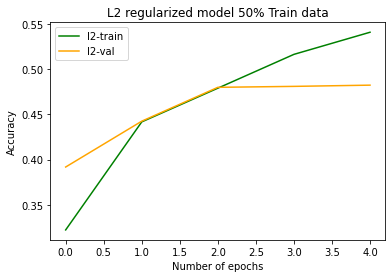

In [ ]:

plt.plot(trained_model_l2.history["accuracy"], color ="green", label = "l2-train")
plt.plot(trained_model_l2.history["val_accuracy"], color ="orange", label = "l2-val")
plt.title("L2 regularized model 50% Train data")
plt.ylabel("Accuracy")
plt.xlabel("Number of epochs")
plt.legend()
plt.show()

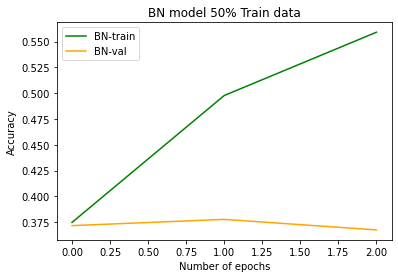

In [ ]:

from matplotlib import pyplot as plt
plt.plot(trained_model_BN.history["accuracy"], color ="green", label = "BN-train")
plt.plot(trained_model_BN.history["val_accuracy"], color ="orange", label = "BN-val")
plt.title("BN model 50% Train data")
plt.ylabel("Accuracy")
plt.xlabel("Number of epochs")
plt.legend()
plt.show()

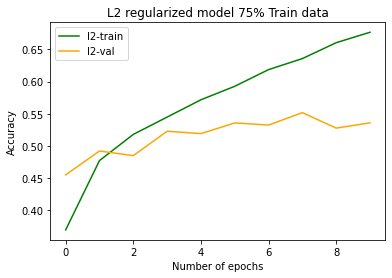

In [ ]:

plt.plot(trained_model_l2_75.history["accuracy"], color ="green", label = "l2-train")
plt.plot(trained_model_l2_75.history["val_accuracy"], color ="orange", label = "l2-val")
plt.title("L2 regularized model 75% Train data")
plt.ylabel("Accuracy")
plt.xlabel("Number of epochs")
plt.legend()
plt.show()

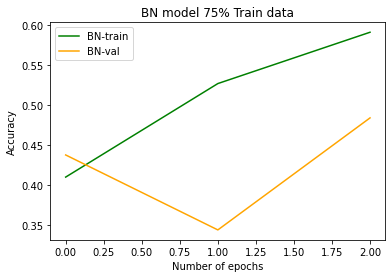

In [ ]:

from matplotlib import pyplot as plt
plt.plot(trained_model_BN_75.history["accuracy"], color ="green", label = "BN-train")
plt.plot(trained_model_BN_75.history["val_accuracy"], color ="orange", label = "BN-val")
plt.title("BN model 75% Train data")
plt.ylabel("Accuracy")
plt.xlabel("Number of epochs")
plt.legend()
plt.show()

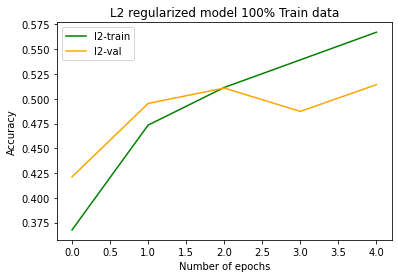

In [ ]:

plt.plot(trained_model_l2_100.history["accuracy"], color ="green", label = "l2-train")
plt.plot(trained_model_l2_100.history["val_accuracy"], color ="orange", label = "l2-val")
plt.title("L2 regularized model 100% Train data")
plt.ylabel("Accuracy")
plt.xlabel("Number of epochs")
plt.legend()
plt.show()

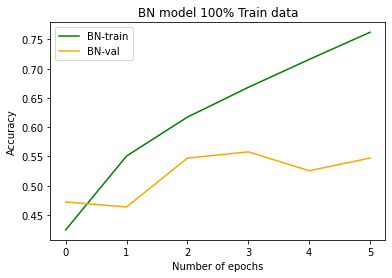

In [ ]:

from matplotlib import pyplot as plt
plt.plot(trained_model_BN_100.history["accuracy"], color ="green", label = "BN-train")
plt.plot(trained_model_BN_100.history["val_accuracy"], color ="orange", label = "BN-val")
plt.title("BN model 100% Train data")
plt.ylabel("Accuracy")
plt.xlabel("Number of epochs")
plt.legend()
plt.show()